In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df1 = df1.drop(['Unnamed: 0'], axis=1)
df2 = df2.drop(['Unnamed: 0'], axis=1)
#df3 = pd.read_csv("train3.csv") #will be used in Part D

In [2]:
df1_data = df1.values[:,:2]
df1_labels = df1.values[:, 2]
c1 = df1_data[df1_labels==0]
c2 = df1_data[df1_labels==1]
# print(np.cov(c1.T))  # c1T.shape=(1, 2000)
# print(np.cov(c2.T))

In [3]:
df2_data = df2.values[:,:2]
df2_labels = df2.values[:,2]
c3 = df2_data[df2_labels==0]
c4 = df2_data[df2_labels==1] 
# print(c3.shape, c4.shape)
cov1 = np.cov(c1.T)
cov2 = np.cov(c2.T)
# print(cov1)
# print(cov2)
# print(cov1[0,0] - cov1[1,1])
# print(cov2[0,0] - cov2[1,1])

# print((cov1[0,0] - cov1[1,1]) < 1e-3)
# print((cov2[0,0] - cov2[1,1]) < 1e-3)
# print((cov1[1,0]) < 1e-3)
# print((cov2[1,0]) < 1e-3)
# print((cov1[0,1]) < 1e-3)
# print((cov2[0,1]) < 1e-3)

# Add your comments as markdown cells(This is a markdown cell).

## To add a markdown cell, simply click on a cell, then click on the 'Cell' tab above, change 'Cell Type' to 'Markdown'

Then add your comment! To view the format of this markdown cell, double click on here.

### Note: We provide you with example codes for starter, but feel free to delete anything we provide and write your own code, as long as you use allowed libraries and modules. 

## Part A: Examine training sets

[[0.68091842 0.0081905 ]
 [0.0081905  0.39290762]]


C:\Users\bugra\AppData\Local\Temp\ipykernel_200\4070767573.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
C:\Users\bugra\AppData\Local\Temp\ipykernel_200\4070767573.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


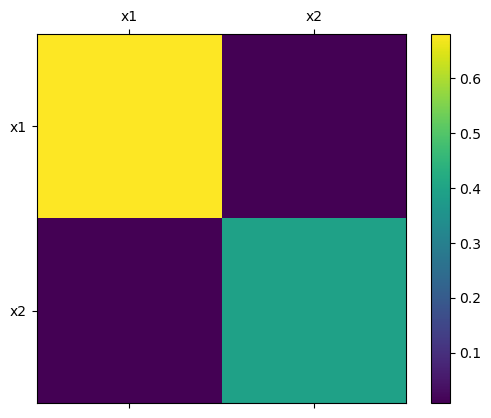

In [4]:
#PART A: Examine training sets here. plots etc.
#Hint: df1_class0 = df1[df1['column_name']==0] creates a new dataframe and includes samples (rows) whose class values are 0
#hint: for data distribution plots use plt.scatter(x-axis,y-axis,other params. check online)
#Hint: for each new plot use plt.figure() so they won't overlap, one on top of another
#-------
#to plot cov. matrices you may use following code: (compute 'cov_mtrx' by yourself)
# c1 = data of class 0 in dataset 1     c2 = data of class 1 in dataset 1
# c3 = data of class 0 in dataset 2     c4 = data of class 1 in dataset 2
cov_mtrx = np.cov(c1.T)
alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx,interpolation='nearest') 
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
print(cov_mtrx)

In dataset 1, for class 0 two features are scarcely correlated, while x1 has a greater variance than x2.

[[0.35380673 0.00907201]
 [0.00907201 1.43810939]]


C:\Users\bugra\AppData\Local\Temp\ipykernel_200\3160527278.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
C:\Users\bugra\AppData\Local\Temp\ipykernel_200\3160527278.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


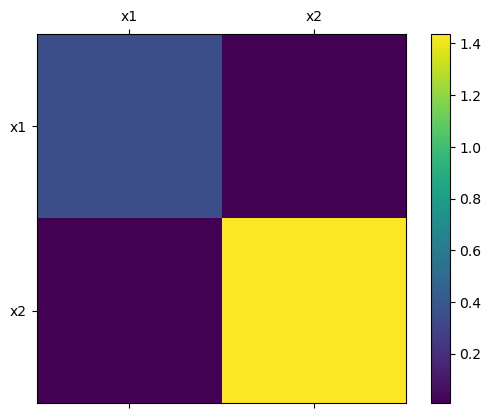

In [5]:
cov_mtrx = np.cov(c2.T)
alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx,interpolation='nearest') 
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
print(cov_mtrx)

In dataset 1, for class 1 two features are scarcely correlated, while x2 has a greater variance than x1.

[[0.43328013 0.09444427]
 [0.09444427 0.06674601]]


C:\Users\bugra\AppData\Local\Temp\ipykernel_200\1658565800.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
C:\Users\bugra\AppData\Local\Temp\ipykernel_200\1658565800.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


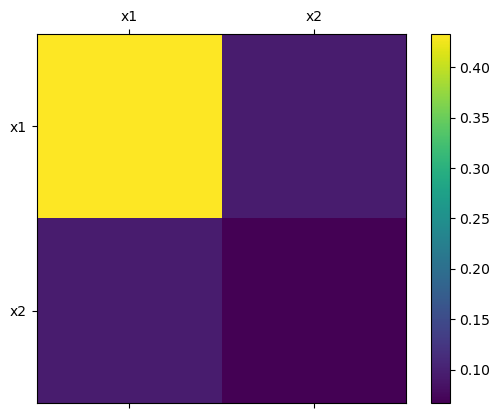

In [6]:
cov_mtrx = np.cov(c3.T)
alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx,interpolation='nearest') 
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
print(cov_mtrx)

In dataset 2, for class 0 two features are scarcely correlated, while x1 has a greater variance than x2.

C:\Users\bugra\AppData\Local\Temp\ipykernel_200\2654201256.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
C:\Users\bugra\AppData\Local\Temp\ipykernel_200\2654201256.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


[[0.43333327 0.09428412]
 [0.09428412 0.06666807]]


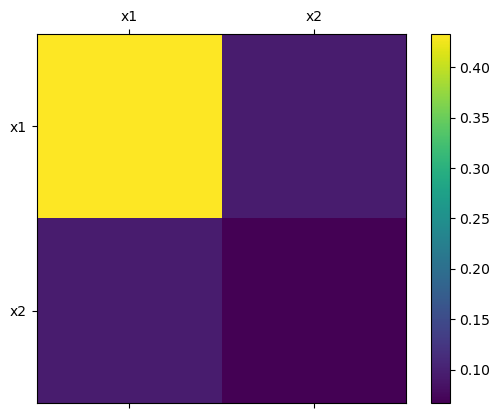

In [7]:
cov_mtrx = np.cov(c4.T)
alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx,interpolation='nearest') 
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
print(cov_mtrx)

In dataset 2, for class 1 two features are scarcely correlated, while x1 has a greater variance than x2. Also it can be seen that in dataset 2, covariance matrices of classes are nearly the same. As we will see in one of the next graph, dataset 2 has two classes with nearly same variances.

[Text(0.5, 1.0, 'Data distribution of feature 1 of trainingSet 1'),
 Text(0, 0.5, 'Frequency')]

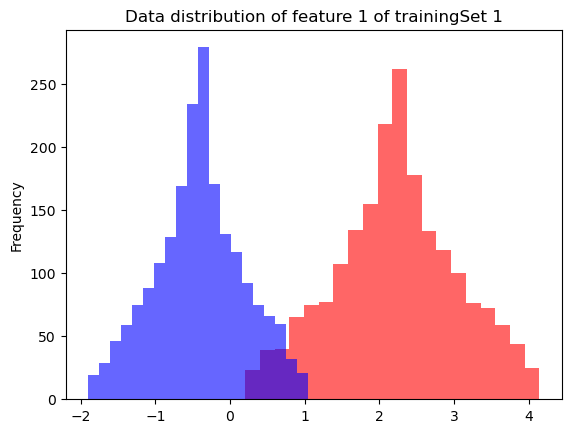

In [8]:
#c1[:,:1]  -> class 0 feature 1 dataset 1       c1[:,1:2] -> class 0 feature 2 dataset 1
# feature 2 has greater variance 
plt.hist(c1[:,:1], color='red', bins = 20, alpha=0.6)
plt.hist(c2[:,:1], color='blue', bins = 20, alpha=0.6)
plt.gca().set(title='Data distribution of feature 1 of trainingSet 1', ylabel='Frequency')


With similar variances and different biases, we can say bigger feature 1 is correlated with label being class 0. 

[Text(0.5, 1.0, 'Data distribution of feature 2 of trainingSet 1'),
 Text(0, 0.5, 'Frequency')]

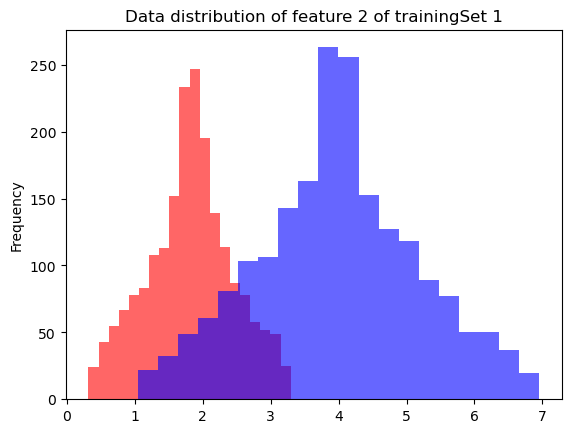

In [9]:
plt.hist(c1[:,1:2], color='red', bins = 20, alpha=0.6)
plt.hist(c2[:,1:2], color='blue', bins = 20, alpha=0.6)
plt.gca().set(title='Data distribution of feature 2 of trainingSet 1', ylabel='Frequency')

Even class 1 distribution of feature 2 has bigger variance, we can say that feature 2 of dataset 1 is correlated with class being 1. 

[Text(0.5, 1.0, 'Data distribution of feature 1 of trainingSet 2'),
 Text(0, 0.5, 'Frequency')]

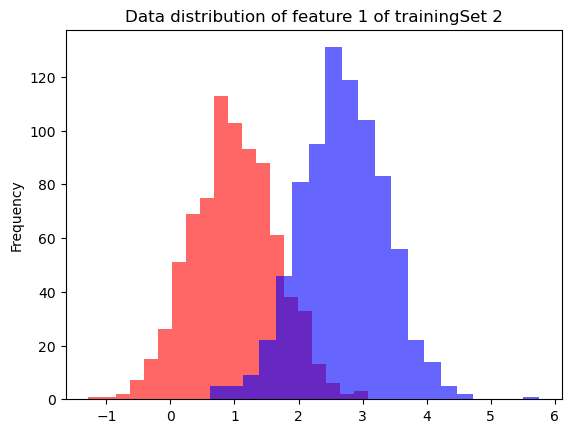

In [10]:
plt.hist(c3[:,:1], color='red', bins = 20, alpha=0.6)
plt.hist(c4[:,:1], color='blue', bins = 20, alpha=0.6)
plt.gca().set(title='Data distribution of feature 1 of trainingSet 2', ylabel='Frequency')

We can say feature 1 of dataset 2 is correlated with class being 1. 

[Text(0.5, 1.0, 'Data distribution of feature 2 of trainingSet 2'),
 Text(0, 0.5, 'Frequency')]

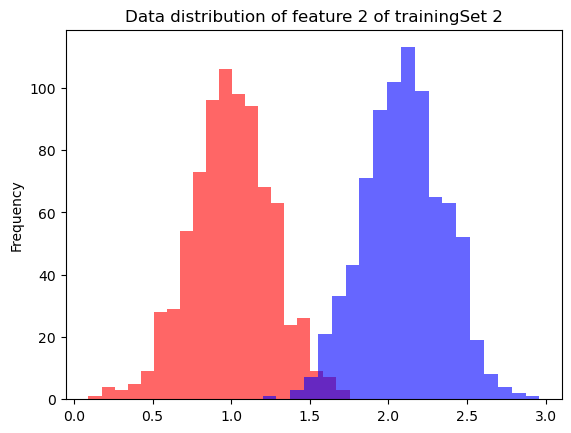

In [11]:
plt.hist(c3[:,1:2], color='red', bins = 20, alpha=0.6)
plt.hist(c4[:,1:2], color='blue', bins = 20, alpha=0.6)
plt.gca().set(title='Data distribution of feature 2 of trainingSet 2', ylabel='Frequency')

We can say feature 2 of dataset 2 is correlated with class being 1. 

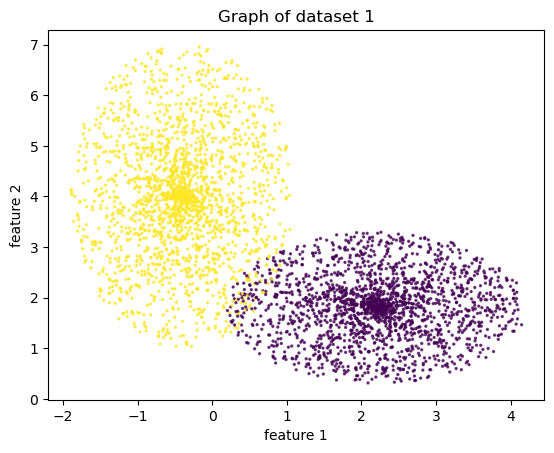

In [12]:
plt.title('Graph of dataset 1')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.scatter(df1_data[:,:1].T, df1_data[:,1:2].T, c=df1_labels, alpha=0.7, s=2)

We can see from this graph dataset 1, class 0 as yellow and class 1 as purple. We can say that two classes generated from similar distributions but their variances are different.

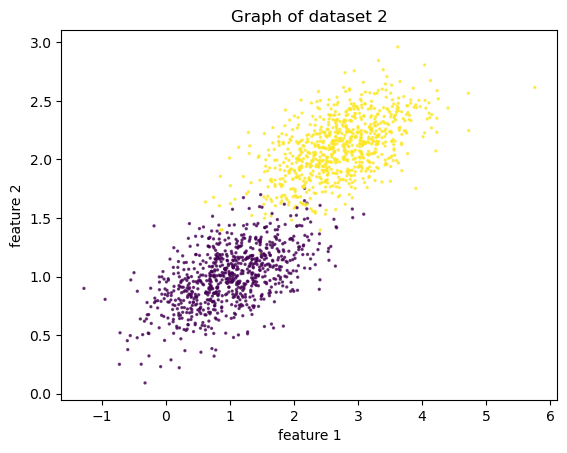

In [13]:
plt.title('Graph of dataset 2')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.scatter(df2_data[:,:1].T, df2_data[:,1:2].T, c=df2_labels, alpha=0.7, s=2)

We can see from this graph dataset 2, class 0 as yellow and class 1 as purple. We can say that two classes have similar variances while they have different biases. We also interpreted this as we saw that in dataset 2, covariance matrices of classes are same.

In [14]:
#Implement PART B:
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")
test1 = test1.drop(['Unnamed: 0'], axis=1)
test2 = test2.drop(['Unnamed: 0'], axis=1)

test_data = test1.values[:,:2]
test_label = test1.values[:,2]

### this function calculates W, w, b from training data and use them to determine the labels of testing data
def trainAndPredictBayes(trainingSamples , trainingLabels, testing_data ): 
    data_c0 = trainingSamples[trainingLabels==0]
    data_c1 = trainingSamples[trainingLabels==1]
    
    prior_c0 = data_c0.size / trainingSamples.size
    prior_c1 = data_c1.size / trainingSamples.size
    
    cov_mtrx_c0 = np.cov(data_c0.T)
    cov_mtrx_c1 = np.cov(data_c1.T)
    
    mean_class0 = np.sum(data_c0, axis=0) / data_c0.shape[0]
    mean_class1 = np.sum(data_c1, axis=0) / data_c1.shape[0]
    
    preds = list() # create an empty list, this will hold our label predictions 
    
    
    # I did not fully understood homework explaination as it states 'Compute the linear discriminant function for each class' 
    # and then while stating cases, 'General case where the discriminant function gi(x) is quadratic'.
    # How can it be linear and quadratic, I think I missed something. I couldn't ask because there was very little time left to the deadline.
    # But at the end, I end up with the formulas below
    
    # calculating w and b values, for equal variances case i used gi(x) = wiT x + wi0 formula 
    # and for general case gi(x) =  xT Wi x + wiT x + wi0 from 
    # Ethem Alpaydin-Introduction to Machine Learning-The MIT Press (2014), 5.5 Multivariate Classification part.
          
    if (np.amax(abs(cov_mtrx_c0 - cov_mtrx_c1)) <= 10**(-3)): # special case, equal covariances across classes
        for x in testing_data: # take every sample and do following
            class_value = list() 
            # create an empty list, this will hold our result value of bayesian classification function, 
            # means that how likely that sample belong to the class, so we will take bigger across classes
            
            # basicly what we do here is to calculate common covariance and multiply inverse of it with x to 'revert' covariance 
            # effects. 
            common_cov = cov_mtrx_c0 + cov_mtrx_c1 

            # train
            w = np.linalg.inv(common_cov) @ mean_class0
            b = -0.5 * (mean_class0.T @ np.linalg.inv(common_cov) @ mean_class0) + prior_c0
            
            #predict
            result = w.T @ x + b # linear discriminant function gi(x) for class 0
            class_value.append(result)

            w = np.linalg.inv(common_cov) @ mean_class1
            b = -0.5 * (mean_class1.T @ np.linalg.inv(common_cov) @ mean_class1) + prior_c1
            
            result = w.T @ x + b # linear discriminant function gi(x) for class 1
            class_value.append(result)

            pred = np.argmax(class_value) # take bigger as predicted label
            preds.append(pred)
        return np.array(preds)
    else : #general case, quadratic formula
        for x in testing_data:
            class_value = list()
            
            W = -0.5 * np.linalg.inv(cov_mtrx_c0)
            w = np.linalg.inv(cov_mtrx_c0) @ mean_class0
            b = -0.5 * mean_class0.T @ np.linalg.inv(cov_mtrx_c0) @ mean_class0 - 0.5 * np.log(np.linalg.det(cov_mtrx_c0)) + prior_c0
            
            x_normalised = x - mean_class0
            result = x_normalised.T @ W @ x_normalised + w @ x_normalised + b
            class_value.append(result)
            
            W = -0.5 * np.linalg.inv(cov_mtrx_c1)
            w = np.linalg.inv(cov_mtrx_c1) @ mean_class1
            b = -0.5 * mean_class1.T @ np.linalg.inv(cov_mtrx_c1) @ mean_class1 - 0.5 * np.log(np.linalg.det(cov_mtrx_c1)) + prior_c1
            
            x_normalised = x - mean_class1
            result = x_normalised.T @ W @ x_normalised + w @ x_normalised + b
            class_value.append(result)
            
            pred = np.argmax(class_value) # take maximum
            preds.append(pred)
        return np.array(preds)
        
        
test_data = test1.values[:,:2]   # assign data and target datasets to use
test_label = test1.values[:,2]
result = trainAndPredictBayes(df1_data, df1_labels, test_data) # call linear discriminant function

# testing classifier
i = 0
m = 0
while(i < test_data.size/np.unique(test_label).size):
    if(result[i] != test_label[i]):
        m += 1
    i += 1
print("error rate for dataset 1 ->", (m/1000) * 100)

test_data = test2.values[:,:2]  # assign data and target datasets to use
test_label = test2.values[:,2]
result = trainAndPredictBayes(df2_data, df2_labels, test_data)  # call linear discriminant function

# testing classifier
i = 0
m = 0
while(i < test_data.size/np.unique(test_label).size):
    if(result[i] != test_label[i]):
        m += 1
    i += 1
print("error rate for dataset 2 ->", (m/400) * 100)

error rate for dataset 1 -> 2.7
error rate for dataset 2 -> 2.0


In [15]:
#Implement PART C:
def PCA(X, k = None, varRetained = 0.95, show = False):
    #  standardize the data to ensure all variables are on the same scale
    X = (X - np.mean(X, axis=0))/np.std(X)
    
    #calculate covariance matrix
    cov_mat = np.cov(X, rowvar=False)
    
    #calculate eigenvectors and eigenvalues
    eigValues, eigVectors = np.linalg.eig(cov_mat)
    
    # sort eigenvalues, argsort returns indices to sort
    indices = np.argsort(eigValues)[::-1]
    eigValues = eigValues[indices]
    eigVectors = eigVectors[:,indices]
    
    # every eigen value represent the amount of variance in the data that is captured by corresponding eigenvector
    # so to change the feature number according to the variance we want to retain, we use these values
    # we start from biggest to get as much as possible variance from less number of feature
    variance_per_eig = list()
    for i in eigValues:
        variance_per_eig.append(i/sum(eigValues))
    
    retainedVarianceValues = np.cumsum(variance_per_eig)
    
    
    # calculate number of features to retain if not specified
    if k == None:
        k = 0
        for i in retainedVarianceValues:
            if i >= varRetained:
                k = k + 1
                break
    
    # projection matrix consists of eigen vector groups, one eigen vector per feature
    projectionMatrix = np.array(eigVectors[:, :k])
    
    # multply them to obtain our new independent principal components
    reducedFeatures = np.dot(X, projectionMatrix)
    
    # plotting
    x_axis = list(range(1, retainedVarianceValues.size + 1))
    if show == True:
        plt.plot(x_axis, retainedVarianceValues)
        plt.xlabel('Number of Features')
        plt.ylabel('Percentage variance retained')
        plt.title('PCA %σ2 vs # features')
        plt.show()
    
    return projectionMatrix, reducedFeatures


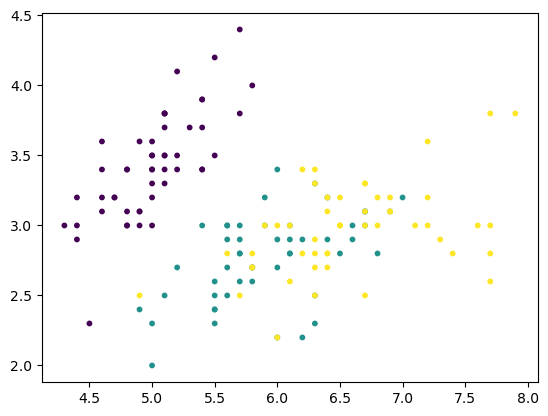

In [16]:
#Testing
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target

plt.scatter(iris_data[:,:1], iris_data[:,1:2], c=iris_target, alpha=1, s=10)

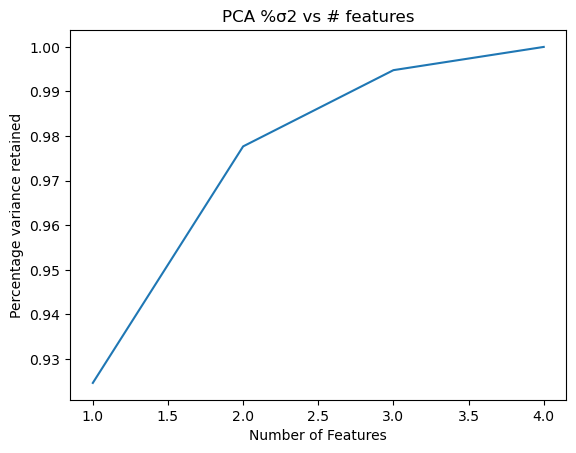

In [17]:
proj_mat, reduced_features = PCA(iris_data, k=2, show=True)

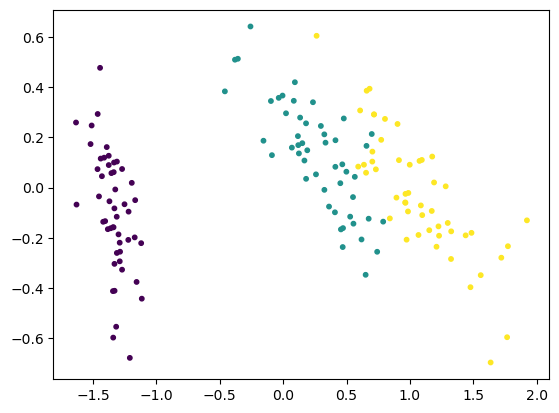

In [18]:
plt.scatter(reduced_features[:,:1], reduced_features[:,1:2], c=iris_target, alpha=1, s=10)

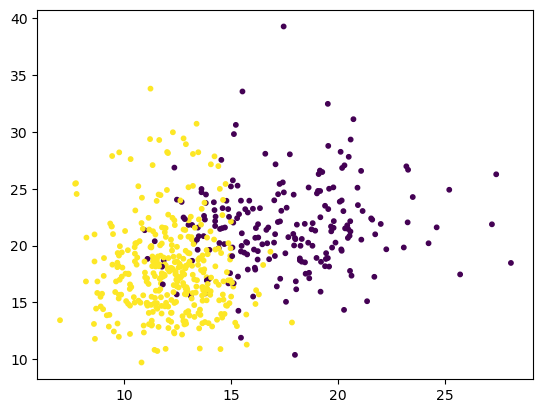

In [19]:
#Testing
breast_cancer = datasets.load_breast_cancer()

breast_cancer_data = breast_cancer.data 
breast_cancer_target = breast_cancer.target

plt.scatter(breast_cancer_data[:,:1], breast_cancer_data[:,1:2], c=breast_cancer_target, alpha=1, s=10)

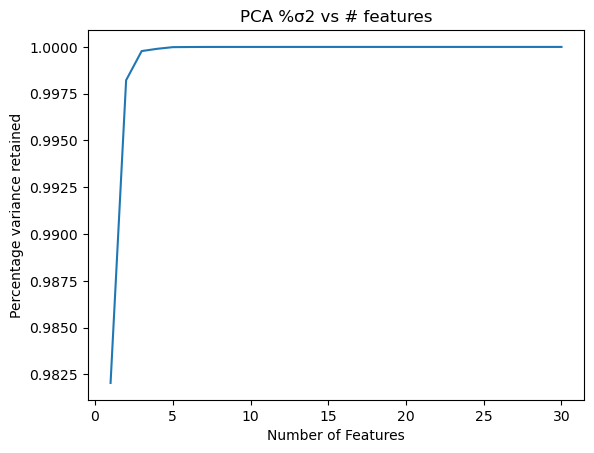

In [20]:
proj_mat, reduced_features = PCA(breast_cancer_data, k=2, show=True)

(569, 2)


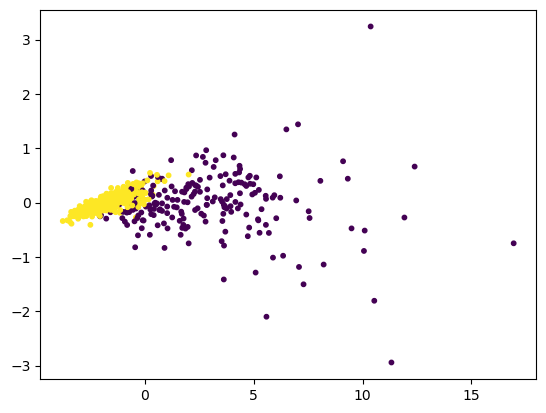

In [21]:
print(reduced_features.shape)
plt.scatter(reduced_features[:,:1], reduced_features[:,1:2], c=breast_cancer_target, alpha=1, s=10)

Evaluation:

- PCA transformed potentially correlated features into a smaller set of uncorrelated variables. Even we decrease the number of features variance can be retained nearly 100%, as can be seen from breast cancer dataset. Because of these variables are uncorrelated, they distribute to the cordinate system so that we can classify easily and also because of smaller number of features means smaller data, so PCA increases performance as well. We got well seperated classes rom iris dataset, while seperation on breast cancer dataset is also good, but with the decrease of feature number from 30 to 2, performance increase stands out even more.  

- Feature selection involves selecting a subset of the most relevant features from the original dataset while feature extraction involves creating new features from the original features by combining them. As I stated above, PCA transformed potentially correlated features into a smaller set of uncorrelated variables, so it falls under feature extraction.

- If features are already uncorrelated, PCA would fail to increase performance or to decrease number of features. Also PCA tend to give its best with the original features, it is sensitive to outliers and they can make PCA to fail. Finally, PCA works if relationships between features are linear, if relationships are non-linear PCA would fail.

- PCA tries to maximize the variance with scarce features. Standardizing the data ensures that all the features have the same variance and this helps PCA to choose the right variables for principal components.

references:
- Alpaydin, E. (2014). Introduction to machine learning (2nd ed.). Cambridge, MA: The MIT Press.
- https://vitalflux.com/machine-learning-feature-selection-feature-extraction/
- https://towardsdatascience.com/linear-discriminant-analysis-1894bbf04359
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
